In [9]:
from IPython import display
import urllib.request, urllib.parse, urllib.error
import twurl
import json
import ssl

ModuleNotFoundError: No module named 'oauth'

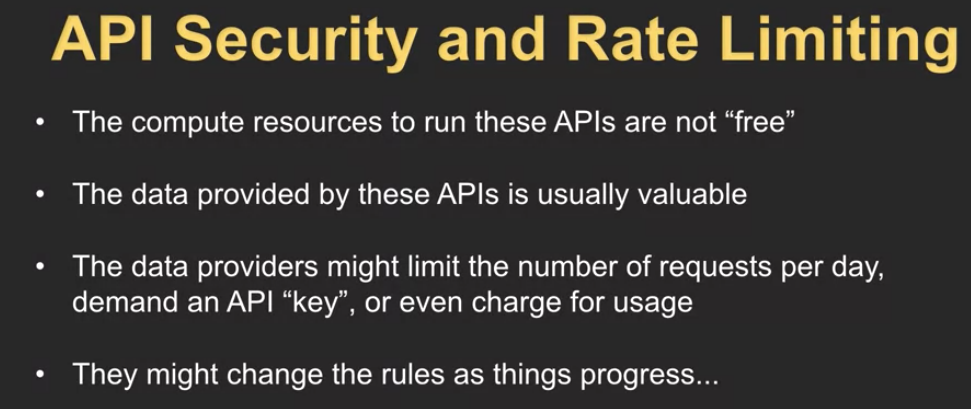

In [3]:
display.Image("/Users/vinod/Desktop/Programming/Google and Twitter API/API#1.png")

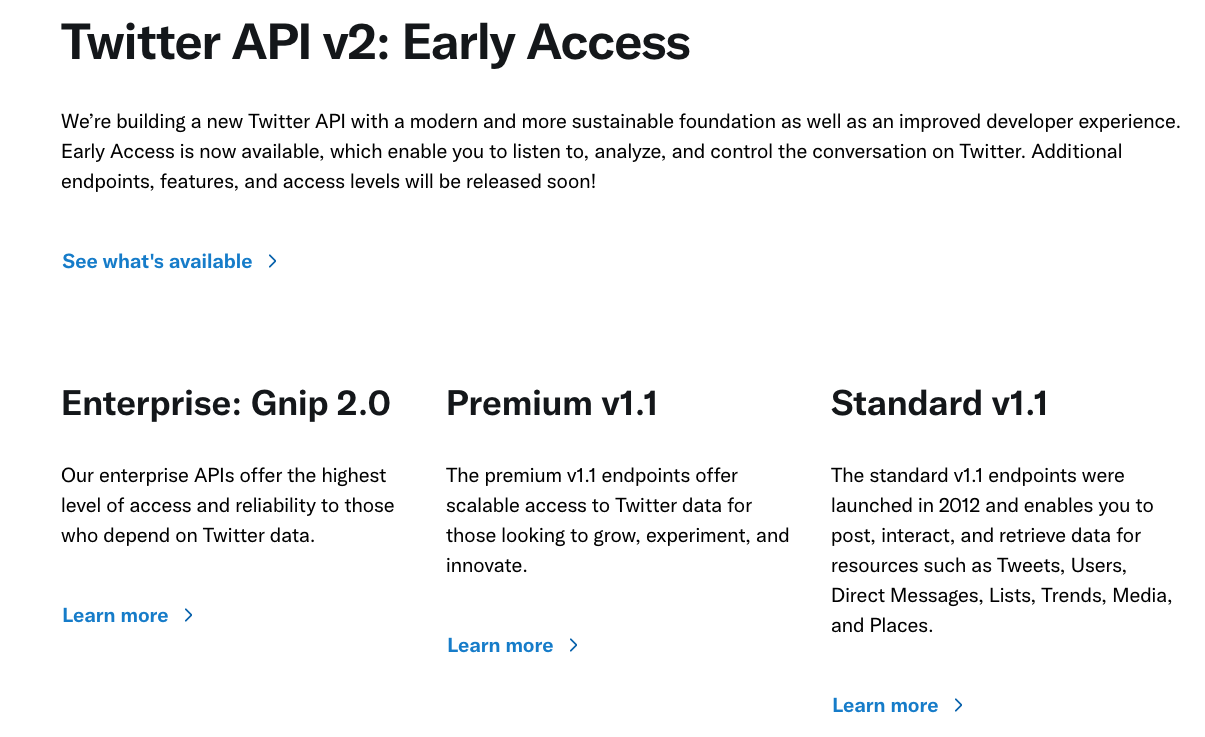

In [5]:
display.Image("/Users/vinod/Desktop/Programming/Twitter-API-UserData/API#2.png")

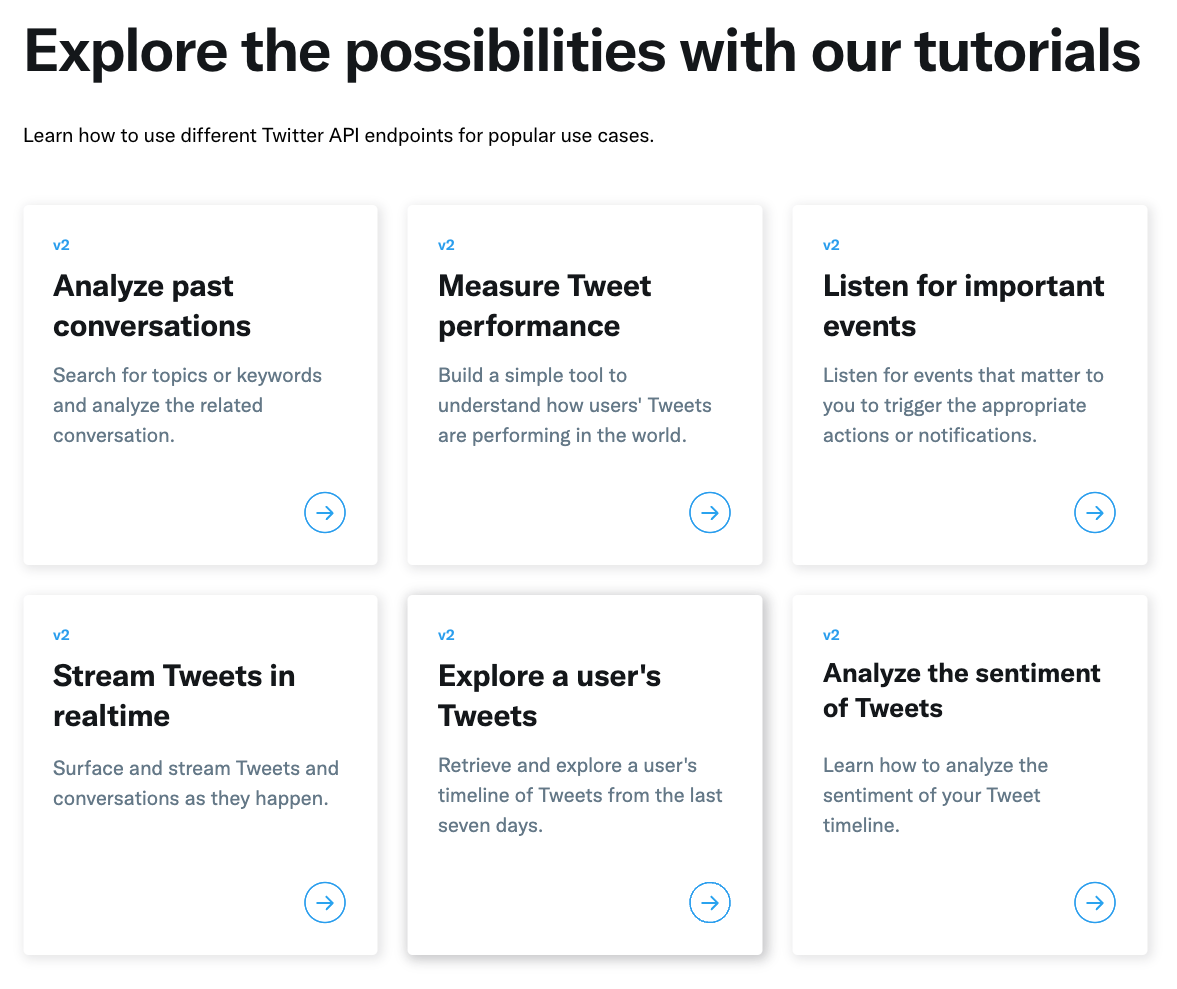

In [7]:
display.Image("/Users/vinod/Desktop/Programming/Twitter-API-UserData/API#3.png")

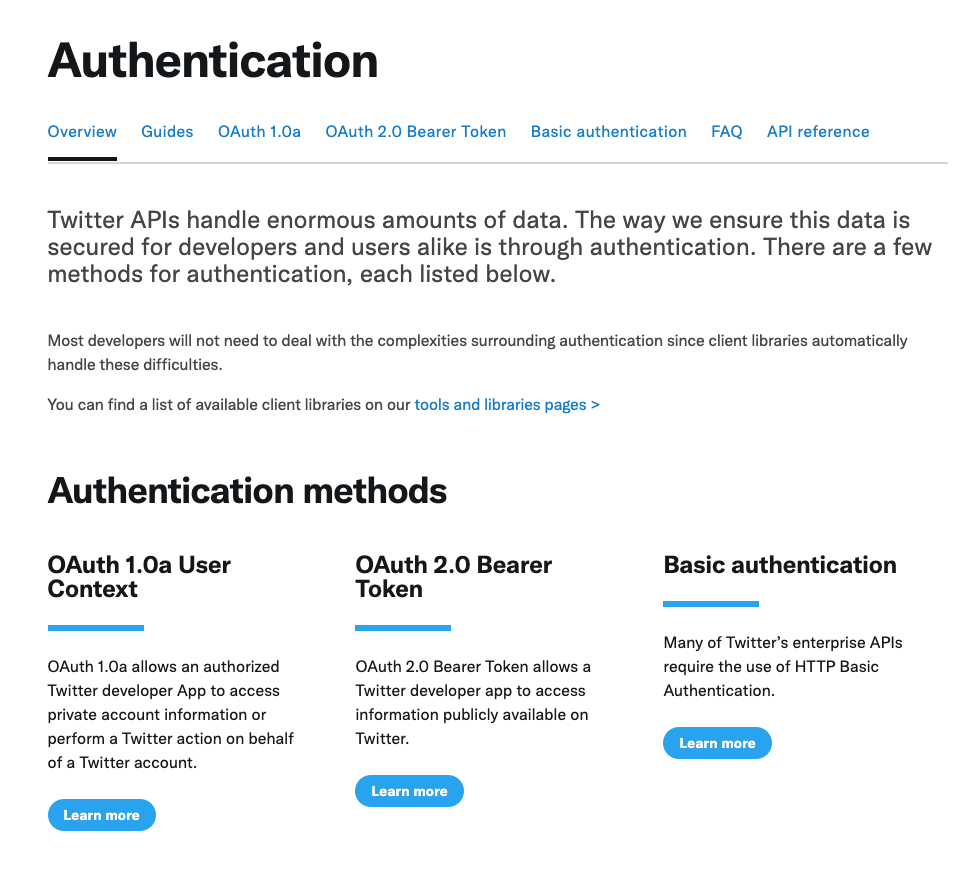

In [8]:
display.Image("/Users/vinod/Desktop/Programming/Twitter-API-UserData/API#4.png")

In [ ]:
# https://apps.twitter.com/
# Create App and get the four strings, put them in hidden.py

TWITTER_URL = 'https://api.twitter.com/1.1/friends/list.json'

# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

while True:
    print('')
    acct = input('Enter Twitter Account:')
    if (len(acct) < 1): break
    url = twurl.augment(TWITTER_URL,
                        {'screen_name': acct, 'count': '5'})
    print('Retrieving', url)
    connection = urllib.request.urlopen(url, context=ctx)
    data = connection.read().decode()

    js = json.loads(data)
    print(json.dumps(js, indent=2))

    headers = dict(connection.getheaders())
    print('Remaining', headers['x-rate-limit-remaining'])

    for u in js['users']:
        print(u['screen_name'])
        if 'status' not in u:
            print('   * No status found')
            continue
        s = u['status']['text']
        print('  ', s[:50])
